In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [2]:
df=pd.read_csv("TitanicNour.csv",sep=",")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.shape

(1310, 14)

In [4]:
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [5]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [7]:
df.drop("boat",1,inplace=True)


In [8]:
df.drop("body",1,inplace=True)
df.drop("cabin",1,inplace=True)

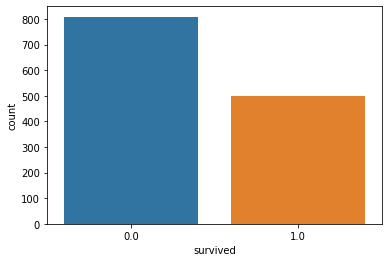

In [9]:
sns.countplot(data=df,x='survived')

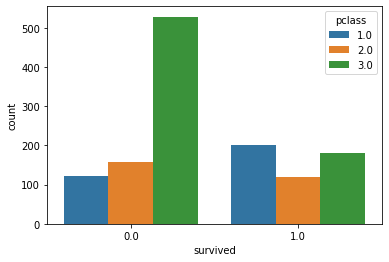

In [10]:
# bich nchoufou amahaya il class illi 3andhaakthar survived
sns.countplot(data= df ,x='survived', hue='pclass')

In [11]:
#bich nchoufou 9adeh min mra 3achit w 9adeh min Rajil 3ach
df[df.survived==1].groupby(['sex']).survived.count()

sex
female    339
male      161
Name: survived, dtype: int64

In [12]:
#nchoufou il pourcentage mta3 il nsé illi 3achou w il Rjel illi 3achou
print('survived female:',(df[df.sex == 'female'].survived.sum())/(df[df.sex == 'female'].survived.count()))
print('survived male:',(df[df.sex == 'male'].survived.sum())/(df[df.sex == 'male'].survived.count()))

survived female: 0.7274678111587983
survived male: 0.19098457888493475


In [13]:
#dataframe il kol téb3a il female
df[df.sex == 'female'].survived

0       1.0
2       0.0
4       0.0
6       1.0
8       1.0
       ... 
1286    1.0
1290    1.0
1300    1.0
1304    0.0
1305    0.0
Name: survived, Length: 466, dtype: float64

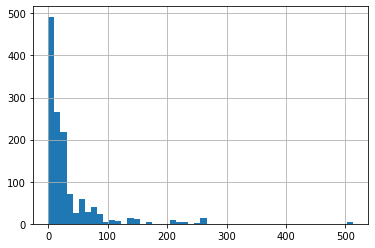

In [14]:
#nchoufou la3bed 9adeh 5alsit
df.fare.hist(bins=50)

In [15]:
#information 3ala il data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 11 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
embarked     1307 non-null object
home.dest    745 non-null object
dtypes: float64(6), object(5)
memory usage: 112.7+ KB


In [16]:
#nchoufou les valeur null
df.isnull().sum()

pclass         1
survived       1
name           1
sex            1
age          264
sibsp          1
parch          1
ticket         1
fare           2
embarked       3
home.dest    565
dtype: int64

In [17]:
df.dropna(inplace=True)
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
home.dest    0
dtype: int64

In [18]:
df.shape

(684, 11)

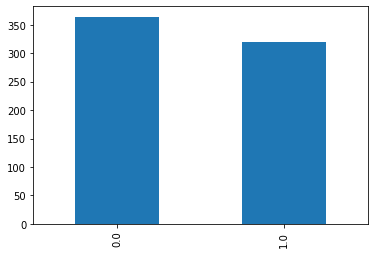

In [19]:
df["survived"].value_counts().plot(kind='bar')

In [20]:
df[df["sex"]=='female']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,S,"St Louis, MO"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0,1.0,0.0,13502,77.9583,S,"Hudson, NY"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2.0,0.0,11769,51.4792,S,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...
818,3.0,1.0,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0.0,0.0,35851,7.7333,Q,"Co Longford, Ireland New York, NY"
823,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.5250,S,"Strood, Kent, England Detroit, MI"
828,3.0,0.0,"Goodwin, Miss. Jessie Allis",female,10.0,5.0,2.0,CA 2144,46.9000,S,"Wiltshire, England Niagara Falls, NY"
829,3.0,0.0,"Goodwin, Miss. Lillian Amy",female,16.0,5.0,2.0,CA 2144,46.9000,S,"Wiltshire, England Niagara Falls, NY"


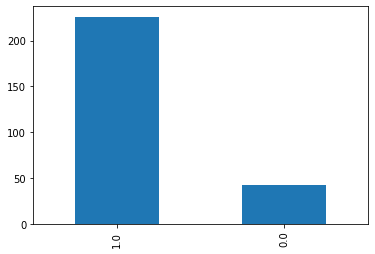

In [21]:
df[df["sex"]=='female']['survived'].value_counts().plot(kind='bar')

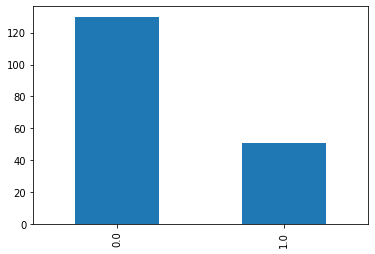

In [22]:
df[df["pclass"]==3]["survived"].value_counts().plot(kind='bar')

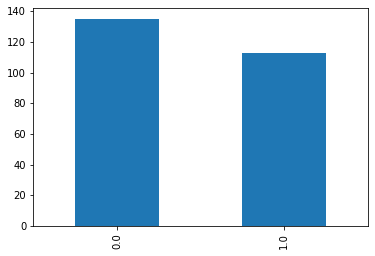

In [23]:
df[df["pclass"]==2]["survived"].value_counts().plot(kind='bar')

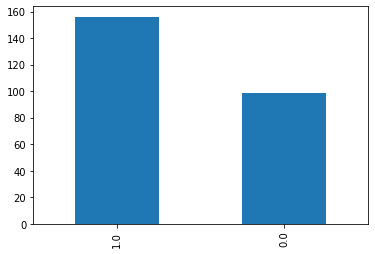

In [24]:
df[df["pclass"]==1]["survived"].value_counts().plot(kind='bar')

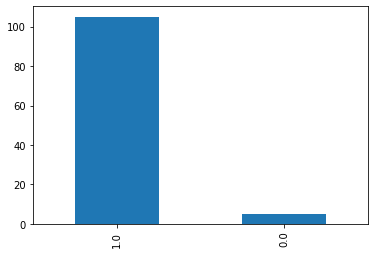

In [25]:
df[(df["pclass"]==1)&(df["sex"]=='female')]["survived"].value_counts().plot(kind='bar')

In [26]:
def plot_correlation_map( df ):

    corr= df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

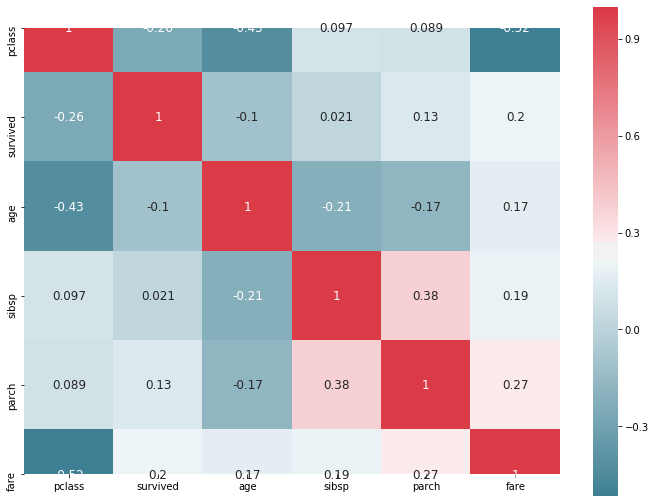

In [27]:
plot_correlation_map(df)

In [28]:
print (type (df.groupby ('pclass'). mean ())) 
df.groupby ('pclass'). mean ()

<class 'pandas.core.frame.DataFrame'>


,survived,age,sibsp,parch,fare
pclass,,,,,
1.0,0.611765,39.795752,0.529412,0.458824,85.525295
2.0,0.455645,29.442540,0.431452,0.411290,22.005914
3.0,0.281768,23.753223,0.773481,0.679558,15.051702


In [29]:
title=[]
df1=''
for data in df['name']:
    df1=data.split(',')
    df1=df1[1].split('.')
    title.append(str(df1[0]))
df['title']=title 
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,"St Louis, MO",Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",Master
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",Mrs


In [30]:
print(df['name'])

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
838                        Gustafsson, Mr. Johan Birger
839                         Gustafsson, Mr. Karl Gideon
1063                     Nirva, Mr. Iisakki Antino Aijo
1089                        Olsvigen, Mr. Thor Anderson
1281                               Waelens, Mr. Achille
Name: name, Length: 684, dtype: object


In [31]:
df['sex']=df['sex'].map({'female':1,'male':0})


In [32]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=df[["pclass", "sex", "age" ,"sibsp" ,"parch" ]]
y=df["survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


H:\Nouveau dossier\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
home.dest    0
title        0
dtype: int64

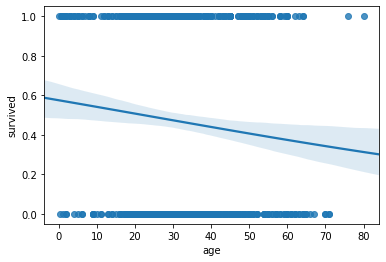

In [34]:
import seaborn as sns
sns.regplot(x="age",y='survived',data=df,logistic=True)

# If p >= 0.5, then they survived.

# If p < 0.5, then they survived



In [35]:
confusion_matrix=pd.crosstab(logreg.predict(x),y)
print(confusion_matrix)

survived  0.0  1.0
row_0             
0.0       319   86
1.0        45  234


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       128
         1.0       0.87      0.75      0.80       112

    accuracy                           0.83       240
   macro avg       0.84      0.82      0.83       240
weighted avg       0.83      0.83      0.83       240



In [37]:
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

H:\Nouveau dossier\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


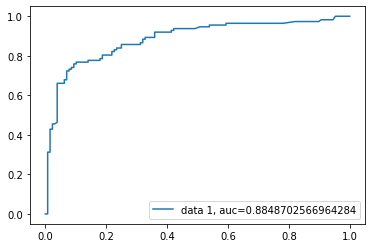

In [38]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [39]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction


#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7875


In [43]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model


Accuracy: 0.7708333333333334


# logistic regression :Accuracy=0.83
# DecisionTreeClassifier:score:0.7875
# RandomForestClassifier:Accuracy: 0.7708333333333334
# logistic regression is the best